<div style='width:20em'><img src='img/logo-igm.png'></div>
<div style='font-size:larger'><strong>Algorithmique et programmation 2</strong><br>
L1 Mathématiques - L1 Informatique<br>
Semestre 2
</div>

# Algorithmes de tri

## Introduction et rappels

Chercher un élément dans une liste non triée de taille $n$ peut se faire par *recherche exhaustive*
 
- Complexité $O(n)$
- Sans autre hypothèse on ne peut pas faire mieux


Chercher un élément dans une liste *triée* de taille $n$ peut se faire par *recherche binaire* (ou *dichotomie*)

- Complexité $O(\log n)$ (exponentiellement plus rapide !!)
- Sans autre hypothèse on ne peut pas faire mieux


Conclusion : si on a besoin de chercher fréquemment, on a intérêt à trier (ou à maintenir les données triées)

- Si ce n'est pas trop coûteux !
- D'où l'intérêt d'algorithmes *efficaces*

**Problème du tri**

- *Données:* une liste `lst`
- *Résultat:* une liste contenant les mêmes éléments que `lst` dans l'ordre croissant

**Variantes possibles :**
- Création d'une nouvelle liste ou modification de la liste reçue
- Tri selon d'autres critères

**Remarques:**
- On suppose que les éléments de `lst` sont comparables
- On travaille ici sur des listes croissantes d'entiers, mais le raisonnement reste le même pour d'autres types

Le problème du tri peut être résolu par plusieurs algorithmes d'efficacités diverses

- Trois algorithmes basiques :

    - tri à bulle
    - tri par sélection
    - tri par insertion

- Deux algorithmes plus efficaces :

    - le tri par pivot
    - le tri par fusion

*(Si on a le temps,)* quelques algorithmes plus inhabituels

## Tri à bulle (sur place)


### Algorithme

Paramètre : `lst`

Pour chaque indice `i` de 0 à `len(lst)-1` :
- on parcourt les `n-i` derniers éléments depuis la fin
- on intervertit les éléments voisins mal ordonnés

### Arguments de correction
  
- **Invariant :** après $k$ passages, les $k$ premiers éléments de `lst` sont
  les plus petits et sont triés *(par récurrence)*
    - C'est vrai après 0 passage
    - Au $k$-eme passage (`i` = $k-1$), le plus petit élément parmi les `n-i` derniers remonte en
      position `i`
- Donc après le dernier passage la liste entière est triée


### Implémentation

In [1]:
def echange(lst, i, j):
    lst[i], lst[j] = lst[j], lst[i]

In [2]:

def tri_bulle(lst):
    n = len(lst)
    # on fait croître la portion triée
    for i in range(0, n-1):
        # on fait remonter la bulle dans la portion non triée
        for j in range(n-1, i, -1):
            # échange si voisins mal ordonnés
            if lst[j-1] > lst[j]:
                echange(lst, j, j-1)

In [3]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_bulle(une_liste)

In [4]:
une_liste

[0, 1, 2, 3, 4, 5, 6, 7, 8]

### Complexité

Pour chaque valeur de `i` entre 0 et n-2 :
    
    - `n-i-1` comparaisons dans tous les cas
    - `n-i-1` échanges au pire (0 au mieux)
    - pire cas : liste décroissante
    - meilleur cas : liste croissante
    
Nombre total de comparaisons dans tous les cas:
    $$
    \sum_{i=0}^{n-2} n-i-1 = \sum_{i=1}^{n-1} i = \frac{n(n-1)}{2} \in O(n^2)
    $$

Nombre total d'échanges : 0 au mieux, $O(n^2)$ au pire


### Amélioration possible

Arrêter les comparaisons à la dernière position d'échange

## Tri par sélection


### En construisant une nouvelle liste

#### Algorithme

Paramètre : `lst`

On initialise une liste `resultat` (vide), et tant qu'il reste des éléments à
traiter :
- on cherche et on retire un élément minimal de `lst`
- on place cet élément en fin de `resultat`


#### Correction

- **Invariant :** Après $k$ itérations :
    - Tous les éléments de `resultat` sont plus petits que ceux de `lst`
    - `resultat` contient $k$ éléments et est triée
- Après la dernière étape, `resultat` est triée et contient tous les éléments de
  `lst`

#### Implémentation

In [5]:
def extrait_min(lst):
    i_min = 0
    for i in range(1, len(lst)):
        if lst[i] < lst[i_min]:
            i_min = i
    return lst.pop(i_min)  # WARNING: modifie lst !

In [6]:
def tri_selection(lst):
    res = []
    while len(lst) > 0:
        res.append(extrait_min(lst))
    return res

In [7]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_selection(une_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [8]:
tri_selection(une_liste)  # WARNING !

[]

**Problème :** détruit `lst` (il suffit de commencer par faire une copie) !

In [9]:
def tri_selection(lst):
    lst = lst.copy()
    res = []
    while len(lst) > 0:
        res.append(extrait_min(lst))
    return res

In [10]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_selection(une_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [11]:
tri_selection(une_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

**Problème :** l'instruction `lst.pop(i_min)` n'est pas très efficace...
($O($`len(lst)`$)$ au pire)

### Sur place


#### Algorithme

Pour chaque indice `i` entre 0 et `len(lst)-2` :
- on cherche un élément minimal de `lst[i:]`
- on échange cet élément avec l'élément d'indice `i` 


#### Correction

**Invariant :** Après $k$ itérations :
- Les $k$ premiers éléments de `lst` sont plus petits que tous les suivants
- Les $k$ premiers éléments de `lst` sont triés dans l'ordre croissant

En particulier, après la dernière étape, `lst` est triée

#### Implémentation

In [12]:
def indice_min(lst, debut):
    i_min = debut
    for i in range(debut + 1, len(lst)):
        if lst[i] < lst[i_min]:
            i_min = i
    return i_min

In [13]:
def tri_selection(lst):
    for i in range(len(lst)-1):
        i_min = indice_min(lst, i)
        echange(lst, i, i_min)

In [14]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_selection(une_liste)  # ne renvoie rien !

In [15]:
une_liste  # modifiée ! l'ordre d'origine est perdu

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### Complexité
  
Pour chaque valeur de `i` entre 0 et $n-2$ :
    
- `n-i-1` comparaisons pour trouver le plus petit élément à partir de l'indice `i`
- un seul échange
    
Nombre total de comparaisons (dans tous les cas) :

$$
\sum_{i=0}^{n-2} n-i-1 = \sum_{i=1}^{n-1} i = \frac{n(n-1)}{2} \in O(n^2)
$$

Nombre total d'échanges : $n-1$ (dans tous les cas)

**Remarque :** Pas de pire ni de meilleur cas (complexité indépendante du contenu de la liste)

## Tri par insertion

« Tri du joueur de cartes »

### Version créant une nouvelle liste

#### Algorithme

Paramètre : `lst`

- On crée une liste vide `resultat`
- Pour chaque élément `e` de `lst`, on insère `e` « à la bonne place » dans `resultat`

#### Correction

**Invariant :** Après $k$ itérations, `resultat` contient les $k$ premiers éléments de `lst`, dans l'ordre croissant.

En particulier, après la dernière itération, `resultat` contient tous les éléments de `lst` dans l'ordre croissant

#### Implémentation

In [16]:
def inserer(e, lst):
    i = len(lst)  # on parcourt la liste depuis la fin (pourquoi pas...)
    while i > 0 and lst[i-1] > e:
        i -= 1
    lst.insert(i, e)  # WARNING : modifie lst !

In [17]:
lst = [1, 2, 3]
inserer(0, lst)
lst

[0, 1, 2, 3]

In [18]:
inserer(2.5, lst)
lst

[0, 1, 2, 2.5, 3]

In [19]:
inserer(4, lst)
lst

[0, 1, 2, 2.5, 3, 4]

In [20]:
def tri_insertion(lst):
    resultat = []
    for e in lst:
        inserer(e, resultat)
    return resultat  # lst n'est pas modifiée !

In [21]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_insertion(une_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

### Version sur place


#### Algorithme

Paramètre : `lst`

Pour chaque indice `i` de 1 à `len(lst)-1`, on insère `lst[i]` « à la bonne place » parmi les éléments précédents

**Insertion :** on procède en trois étapes

- sauvegarder l'élément `e` à déplacer
- décaler les éléments précédents plus grands que `e` d'une position vers la
  droite
- affecter la valeur de `e` à la destination

#### Correction

**Invariant :** Après $k$ itérations, `lst[:`$k+1$`]` est triée

En particulier, après la dernière itération, `lst` est triée

#### Implémentation

In [22]:
def decalage(lst, i):
    e = lst[i]  # on sauvegarde l'élément à déplacer
    # on décale d'un cran les éléments précédents plus grands que e
    k = i
    while k > 0 and lst[k-1] > e:
        lst[k] = lst[k-1]
        k = k - 1
    # on insèrer e en position k
    lst[k] = e

In [23]:
lst = [0, 2, 3, 1]
decalage(lst, 3)
lst

[0, 1, 2, 3]

In [24]:
lst = [0, 2, 3, -1]
decalage(lst, 3)
lst

[-1, 0, 2, 3]

In [25]:
lst = [0, 2, 3, 5]
decalage(lst, 3)
lst

[0, 2, 3, 5]

In [26]:
def tri_insertion(lst):
    for i in range(1, len(lst)):
        decalage(lst, i)
    # WARNING : modifie lst, ne renvoie rien

In [27]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_insertion(une_liste)  # ne renvoie rien !

In [28]:
une_liste

[0, 1, 2, 3, 4, 5, 6, 7, 8]

### Complexité (deux versions)
  
Pour chaque valeur de `i` entre 1 et $n$-1 :
  
- Entre 1 et $n$-`i`-1 comparaisons pour trouver l'indice d'insertion
- Entre 0 et $n$-`i`-1 affectations pour décaler les éléments plus grands
  
Nombre de comparaisons ou d'affectations au pire (liste décroissante) :
$$
\sum_{i=0}^{n-2} n-i-1 = \sum_{i=1}^{n-1} i = \frac{n(n-1)}{2} \in O(n^2)
$$

Meilleur cas : $O(n)$ sur liste croissante (aucun décalage)


### Amélioration possible

Chercher la position finale de chaque élément par dichotomie sur le début de la
liste (ne change pas le nombre d'affectations nécessaire)
  


## Autres tris

Les algorithmes de tri déjà présentés ont une complexité élevée ($O(n^2)$).
On va voir maintenant des algorithmes plus performants :
- le tri rapide
- le tri par fusion

## Tri par pivot / tri rapide

*-- snip --*

<!-- % -----------------------------------------------------------------------------

    \frametitle{Echauffement: le tri pair / impair}

    \item A titre d'échauffement, essayons de résoudre le problème suivant:

  \begin{probleme}[tri pair / impair]\small
    **Objectif:** une liste `lst` de naturels\\
    **Données:** mettre les éléments pairs de `i` au début et les impairs à la fin
  \end{probleme}

    \item Comment résoudre ce problème de manière efficace?



% TODO: il y a sûrement plusieurs options possibles, si d'autres options intermédiaires vous semblent intéressantes
% d'un point de vue pédagogique, n'hésitez pas

% -----------------------------------------------------------------------------

    \frametitle{Echauffement: le tri pair / impair}

    \item Une solution possible: parcourir la liste simultanément avec deux curseurs `len(lst)-1` et `n-i`
    \item Les deux curseurs progressent l'un vers l'autre au départ des extrémités
    \item A chaque fois qu'on tombe sur un couple (`i`, `n-i`) d'éléments mal placés, on les échange

\vfill
    \begin{center}
\begin{tikzpicture}
\tableau{16}{1};
\node (c1) at (0, -.5) {c1};
\node (c2) at (8, -.5) {c2};

\draw[>=stealth,->] (0,-0.25) to (3, -.25);
\draw[>=stealth,->] (8,-0.25) to (5, -.25);
\end{tikzpicture}
    \end{center}


% Exemple à dérouler sur : [7, 7, 10, 0, 1, 0, 9, 9, 5, 10, 8, 5, 3, 10, 5, 0]

 \frametitle{Le tri pair / impair en action}

% 
%     \item Avant de présenter l'algorithme, illustrons son action sur un exemple simple:
\begin{exemple}
\bigskip
\centering
\begin{tikzpicture}
\node (c1) at (0, -1) {curseur 1};
\node (c2) at (8, -1) {curseur 2};

% Etapes pour les curseurs:
\only<1-2> {
    \draw[>=stealth,->] (c1) to (.25, -.05);
    \draw[>=stealth,->] (c2) to (7.75, -.05);
}

\only<3-4> {
    \draw[>=stealth,->] (c1) to (.75, -.05);
    \draw[>=stealth,->] (c2) to (6.75, -.05);
}

\only<5-6> {
    \draw[>=stealth,->] (c1) to (2.25, -.05);
    \draw[>=stealth,->] (c2) to (5.25, -.05);
}

\only<7-8> {
    \draw[>=stealth,->] (c1) to (3.25, -.05);
    \draw[>=stealth,->] (c2) to (4.75, -.05);
}

\only<9> {
    \draw[>=stealth,->] (c1) to (3.75, -.05);
    \draw[>=stealth,->] (c2) to (3.25, -.05);
}

% Affichage en vert des préfixes et suffixes auxquels on ne touchera plus:
\only<1>{
    \node[fill=red,opacity=.5,inner sep=7pt] at (0.25, 0.25) {};
    \node[fill=red,opacity=.5,inner sep=7pt] at (7.75, 0.25) {};
}

\uncover<2->{
    % préfixe
    \node[fill=green,opacity=.5,inner sep=7pt] at (0.25, 0.25) {};
    % suffixe
    \node[fill=green,opacity=.5,inner sep=7pt] at (7.75, 0.25) {};
}

\uncover<3->{
    % préfixe
    % suffixe
    \node[fill=green,opacity=.5,inner sep=7pt] at (7.25, 0.25) {};
}

\only<3>{
    \node[fill=red,opacity=.5,inner sep=7pt] at (0.75, 0.25) {};
    \node[fill=red,opacity=.5,inner sep=7pt] at (6.75, 0.25) {};
}

\uncover<4->{
    % préfixe
    \foreach \abscisse in {0.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
    % suffixe
    \foreach \abscisse in {6.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}

\uncover<5->{
    % préfixe
    \foreach \abscisse in {1.25, 1.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
    % suffixe
    \foreach \abscisse in {6.25, 5.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}

\only<5>{
    \node[fill=red,opacity=.5,inner sep=7pt] at (2.25, 0.25) {};
    \node[fill=red,opacity=.5,inner sep=7pt] at (5.25, 0.25) {};
}

\uncover<6->{
    % préfixe
    \foreach \abscisse in {2.25}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
    % suffixe
    \foreach \abscisse in {5.25}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}

\only<7>{
    \node[fill=red,opacity=.5,inner sep=7pt] at (3.25, 0.25) {};
    \node[fill=red,opacity=.5,inner sep=7pt] at (4.75, 0.25) {};
}

\uncover<7->{
    % préfixe
    \foreach \abscisse in {2.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
    % suffixe
}

\uncover<8->{
    % préfixe
    \foreach \abscisse in {3.25}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
    % suffixe
    \foreach \abscisse in {4.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}

\uncover<9>{
    \foreach \abscisse in {3.75, 4.25}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}


% Etapes pour le contenu :
\tableau{16}{1};

\only<1>{
\foreach[count=\i] \valeur in {7, 7, 10, 0, 1, 0, 9, 9, 5, 10, 8, 5, 3, 10, 5, 0}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\only<2-3>{
\foreach[count=\i] \valeur in {0, 7, 10, 0, 1, 0, 9, 9, 5, 10, 8, 5, 3, 10, 5, 7}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\only<4-5>{
\foreach[count=\i] \valeur in {0, 10, 10, 0, 1, 0, 9, 9, 5, 10, 8, 5, 3, 7, 5, 7}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\only<6-7>{
\foreach[count=\i] \valeur in {0, 10, 10, 0, 8, 0, 9, 9, 5, 10, 1, 5, 3, 7, 5, 7}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\only<8->{
\foreach[count=\i] \valeur in {0, 10, 10, 0, 8, 0, 10, 9, 5, 9, 1, 5, 3, 7, 5, 7}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\end{tikzpicture}

\end{exemple}


\item<9> L'algorithme s'arrête quand les curseurs se croisent




% -----------------------------------------------------------------------------

[fragile]
    \frametitle{Le tri pair / impair en Python}

{
\scriptsize
\begin{pyframe}{}
def pair_impair(lst):
    curseur1, curseur2 = 0, len(lst) - 1
    while curseur1 <= curseur2:
        # repérer le premier élément impair en partant du début
        while curseur1 <= curseur2 and lst[curseur1] % 2 == 0:
            curseur1 += 1

        # repérer le premier élément pair en partant de la fin
        while curseur1 <= curseur2 and lst[curseur2] % 2 != 0:
            curseur2 -= 1

        # si nécessaire, procéder à l'échange
        if curseur1 < curseur2:
            lst[curseur1], lst[curseur2] = lst[curseur2], lst[curseur1]
            curseur1 += 1
            curseur2 -= 1
\end{pyframe}
}

\item Complexité?  \pause \defterm{Temps $O(n)$, espace
    $O(1)$}




% -----------------------------------------------------------------------------


    \frametitle{Généralisation}

    \item On peut utiliser ce principe pour *trier* la liste
    \item Au lieu de se contenter de mettre les pairs au début et les
      impairs à la fin, on peut mettre les éléments inférieurs à une
      certaine valeur avant elle et les autres après elle
    \item Ce principe est à la base du *tri rapide*



% ----------------------------------------------------------------------------- -->

### Version créant une nouvelle liste

#### Algorithme

**Paramètre :** liste `lst` de taille $n$

Si `lst` contient un seul élément ou moins, en renvoyer une copie, sinon :

- Sélectionner un *pivot*, c'est-à-dire une *valeur* `p` de référence dans la
  liste (par exemple la première)

- *Partitionner* `lst` en deux nouvelles listes `inf` et `sup` (ne contenant pas `p`)
      
  - `inf` contient toutes les valeurs inférieures ou égales à `p`
  - `sup` contient toutes les valeurs strictement supérieures à `p`
      
- Trier *récursivement* `inf` et `sup` et renvoyer la concaténation des listes
  obtenues, en plaçant `p` entre les deux

#### Terminaison

Chaque appel récursif se fait sur une liste strictement plus courte, car le pivot n'est ajouté ni à `inf`, ni à `sup`

#### Correction

Par récurrence (complète) sur la taille de la liste à trier

- si `lst` contient zéro ou un élément, elle est déjà triée
- sinon, on suppose l'algorithme correct sur toute liste de longueur $< n$ :
  - l'étape de partition sépare `lst` en `inf` et `sup` contenant au plus $n$-1
    éléments
  - par hypothèse de récurrence, l'étape de tri renvoie deux listes `inf'` et
    `sup'` correctement triées
  - tous les éléments de `inf'` sont inférieurs ou égaux à `p` et tous ceux de
    `sup'` sont supérieurs à `p`
  - donc `inf' + [p] + sup'` est correctement triée

#### Implémentation

In [29]:
def partition(lst):
    p = lst[0]
    inf, sup = [], []
    for i in range(1, len(lst)):
        e = lst[i]
        if e <= p:
            inf.append(e)
        else:
            sup.append(e)
    return p, inf, sup

In [30]:
def tri_rapide(lst):
    if len(lst) <= 1:
        return lst.copy()  # WARNING : pas lst elle-même !
    else:
        p, inf, sup = partition(lst)
        inf = tri_rapide(inf)
        sup = tri_rapide(sup)
        return inf + [p] + sup

In [31]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_rapide(une_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
def tri_rapide(lst, alinea=0):  # version pour comprendre
    if len(lst) <= 1:
        return lst.copy()
    else:
        p, inf, sup = partition(lst)
        print(" "*alinea, "p :", inf, p, sup)
        inf = tri_rapide(inf, alinea+4)
        sup = tri_rapide(sup, alinea+4)
        print(" "*alinea, "r :", inf, p, sup)
        return inf + [p] + sup

In [33]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_rapide(une_liste)

 p : [0, 2, 4, 3, 1] 5 [7, 8, 6]
     p : [] 0 [2, 4, 3, 1]
         p : [1] 2 [4, 3]
             p : [3] 4 []
             r : [3] 4 []
         r : [1] 2 [3, 4]
     r : [] 0 [1, 2, 3, 4]
     p : [6] 7 [8]
     r : [6] 7 [8]
 r : [0, 1, 2, 3, 4] 5 [6, 7, 8]


[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [34]:
from callstats import CallRecorder

@CallRecorder
def tri_rapide(lst):
    if len(lst) <= 1:
        return lst.copy()  # WARNING : pas lst elle-même !
    else:
        p, inf, sup = partition(lst)
        inf = tri_rapide(inf)
        sup = tri_rapide(sup)
        return inf + [p] + sup

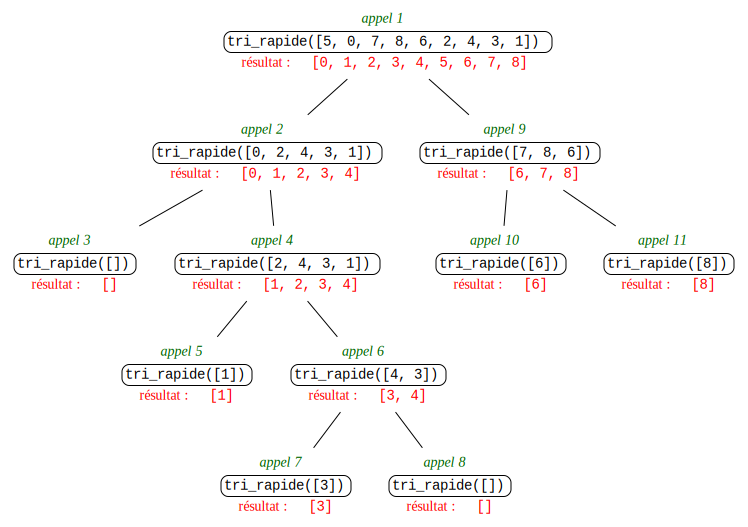

In [35]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
call = tri_rapide(une_liste)
call.graph()

#### Complexité

Calculer `partition(lst)` est en $O($`len(lst)`$)$ soit $O(n)$

Calculer `inf + [p] + sup` est en $O($`len(inf)` $+$ `len(sup)` $+1)$ soit $O(n)$

Donc le tri complet prend dans le pire cas :
$$
T(n) = \max_{k=0}^{n-1} (T(k) + T(n-k) + O(n))
$$
où $k$ représente la taille de `inf`, qui varie entre 0 et $n-1$

Cas particuliers (calculs admis) :
- Le pire cas correspond à $k = 0$, et on obtient $T(n) \in O(n^2)$
- Le meilleur cas correspond à $k = n/2$, on obtient une complexité $O(n \log n)$
- En moyenne (liste aléatoire), on obtient aussi $O(n \log n)$

#### Inconvénients

- Créer de nouvelles listes `inf` et `sup` à chaque appel consomme de la mémoire
- Construire une nouvelle liste `inf + [p] + sup` à chaque appel consomme de la
  mémoire et prend du temps

### Version sur place <img src='img/warning.png' style='display:inline; width:1.5em'>

**Idée :** faire l'étape de partitionnement sans créer de nouvelle liste

#### Algorithme 


##### Partitionnement

**Paramètres :** liste `lst`, indices `debut` et `fin`

- On pose `p = lst[debut]`, `i = debut+1`, `j = fin`
- Tant que les curseurs `i` et `j` ne se sont pas croisés : 
    - on fait avancer le curseur `i` jusqu'à un élément `> p`
    - on fait reculer le curseur `j` jusqu'à un élément `<= p`
    - si nécessaire, on intervertit les valeurs d'indices `i` et `j`
- Enfin, on intervertit les valeurs d'indices `debut` (pivot) et `j` (dernière
  valeur `<= p`)

**Résultat :** position finale du pivot (`j`)


##### Tri

**Paramètres :** liste `lst`, indices `debut` et `fin`

Si `debut >= fin` on ne fait rien, sinon :
- On partitionne `lst` entre `debut` et `fin` et on récupère la nouvelle
  position `ip` du pivot
- On trie récursivement `lst` entre `debut` et `ip - 1` puis entre `i_p + 1` et
  `fin`

#### Terminaison (du partitionnement)

À chaque itération, au moins l'un des deux curseurs progresse strictement


#### Correction

**Partitionnement :** Après chaque itération,
- `lst[debut+1:i]` contient seulement des valeurs `<= p`
- `lst[j:fin+1]` contient seulement des valeurs `> p`

En particulier, en fin de partitionnement, `lst[debut:j+1]` contient seulement
des valeurs `<= p` et `lst[j+1:fin+1]` contient seulement des valeurs `> p`

**Tri :** mêmes arguments que précédemment

#### Implémentation

In [36]:
def partition(lst, debut, fin):
    p, i, j = lst[debut], debut+1, fin
    while i <= j:
        # i avance jusqu'à un élément grand (s'il existe)
        while i <= j and lst[i] <= p: i += 1
        # j recule jusqu'à un élément petit
        while lst[j] > p:  j -= 1
        if i < j:  # si nécessaire, échange
            echange(lst, i, j)
            i += 1
            j -= 1
    # on place le pivot à la frontière (si nécessaire)
    if debut < j:
        echange(lst, debut, j)
    return j  # position finale du pivot

In [37]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
partition(une_liste, 0, len(une_liste)-1)

5

In [38]:
une_liste

[2, 0, 1, 3, 4, 5, 6, 8, 7]

In [39]:
def partition_(lst, debut, fin):  # version pour comprendre
    p, i, j = lst[debut], debut + 1, fin

    while i <= j:
        # i avance jusqu'à un élément grand (s'il existe)
        while i <= j and lst[i] <= p: i += 1  
        # j recule jusqu'à un élément petit
        while lst[j] > p:  j -= 1
        if i < j:  # si nécessaire, échange
            print(f"echange({i}, {j}) : {lst[i]} et {lst[j]}")
            echange(lst, i, j)
            i += 1
            j -= 1
    # on place le pivot à la frontière (si nécessaire)
    if debut < j:
        print(f"echange({debut}, {j}) : {lst[debut]} (pivot) et {lst[j]}")
        echange(lst, debut, j)
    return j  # position finale du pivot

In [40]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
partition_(une_liste, 0, len(une_liste)-1)

echange(2, 8) : 7 et 1
echange(3, 7) : 8 et 3
echange(4, 6) : 6 et 4
echange(0, 5) : 5 (pivot) et 2


5

In [41]:
une_liste

[2, 0, 1, 3, 4, 5, 6, 8, 7]

In [44]:
def tri_pivot_aux(lst, debut, fin):
    if debut < fin:
        ip = partition(lst, debut, fin)
        tri_pivot_aux(lst, debut, ip-1)
        tri_pivot_aux(lst, ip+1, fin)

def tri_pivot(lst):
    tri_pivot_aux(lst, 0, len(lst)-1)

In [45]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_pivot(une_liste)

In [46]:
une_liste

[0, 1, 2, 3, 4, 5, 6, 7, 8]

#### Avantages

Consommation mémoire moindre grâce au partitionnement sur place

Coût en temps moindre (inutile de rassembler les sous-listes après les appels récursifs)

**Mais :** toujours $O(n^2)$ au pire (quand la liste est déjà triée ou presque) !! 

**Problème :** cas fréquent en pratique... (au moins) 2 solutions :

- Mélanger la liste avant de commencer (`random.shuffle`, détails à suivre)
- Choisir un pivot au hasard avant de partitionner

On peut montrer qu'un temps de calcul proche de $n^2$ devient *extrêmement peu probable* 

In [47]:
from random import shuffle

def tri_pivot(lst):
    shuffle(lst)
    tri_pivot_aux(lst, 0, len(lst)-1)

*-- snip --*

<!-- \begin{exemple}
\centering
\begin{tikzpicture}
\visible<1-5> {
  \node (c1) at (0, -1) {curseur 1};
  \node (c2) at (4, -1) {curseur 2};
}

% Etapes pour les curseurs:
\only<1> {
    \draw[>=stealth,->] (c1) to (.75, -.05);
    \draw[>=stealth,->] (c2) to (3.75, -.05);
}

\only<2-3> {
    \draw[>=stealth,->] (c1) to (1.75, -.05);
    \draw[>=stealth,->] (c2) to (3.25, -.05);
}

\only<4-5> {
    \draw[>=stealth,->] (c1) to (2.25, -.05);
    \draw[>=stealth,->] (c2) to (1.75, -.05);
}

\only<1-4>{
    %pivot
    \node[fill=blue,opacity=.5,inner sep=7pt] at (0.25, 0.25) {};
}

% Affichage en vert des préfixes et suffixes auxquels on ne touchera plus:
\only<2-4>{
    % préfixe
    \foreach \abscisse in {0.75, 1.25}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
    % suffixe
    \foreach \abscisse in {3.75}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}

\only<3>{
    % échange
    \foreach \abscisse in {1.75, 3.25}
        \node[fill=red,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}


\only<4>{
    \foreach \abscisse in {1.75, 2.25, 2.75, 3.25}
        \node[fill=green,opacity=.5,inner sep=7pt] at (\abscisse, 0.25) {};
}

% Placement du pivot

\only<5> {
  \node[fill=red,opacity=.5,inner sep=7pt] at (0.25, 0.25) {};
  \node[fill=blue,opacity=.5,inner sep=7pt] at (1.75, 0.25) {};
}
\only<6> {
  \node[fill=blue,opacity=.5,inner sep=7pt] at (1.75, 0.25) {};
}

% Etapes pour le contenu:
\tableau{8}{1};

\only<1-2>{
\foreach[count=\i] \valeur in {3, 2, 1, 6, 4, 7, 2, 5}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\only<3-4>{
\foreach[count=\i] \valeur in {3, 2, 1, 2, 4, 7, 6, 5}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\only<5->{
\foreach[count=\i] \valeur in {2, 2, 1, 3, 4, 7, 6, 5}
    \node at (-0.25+\i/2,0.25) {\tiny \valeur};
}

\end{tikzpicture}
\end{exemple} -->

### Conclusion sur le tri par pivot

Algorithme mauvais dans le pire cas (probabilité faible), mais très efficace en pratique

## Tri par fusion

Ce tri se décrit plus facilement en créant une nouvelle liste

### Algorithme (tri)

**Paramètre :** liste `lst`

Si `lst` contient 0 ou 1 élément, on en renvoie une copie. Sinon :
- On divise `lst` en deux listes de tailles à peu près égales
- On trie les deux sous-listes
- On fusionne les résultats en une seule liste



<img src='img/fusion.png'>

### Algorithme (fusion)

**Paramètres :** listes triées `lst1`, `lst2`

On utilise deux curseurs `i` et `j` parcourant `lst1` et `lst2` en parallèle
dans le même sens, et on initialise une liste vide `resultat`
- À chaque étape, on ajoute `min(lst1[i], lst2[j])` en fin de `resultat`
- Si une des listes est épuisée on recopie la fin de l'autre dans `resultat`

### Terminaison

Chaque appel récursif à l'algorithme de tri se fait sur une liste strictement plus courte, car `lst` contient au moins deux éléments et on la coupe (à peu près) au milieu

### Correction


#### Fusion

**Invariant (boucle `while`):** `resultat` contient les `i + j` plus petits éléments de la
réunion de `lst1` et `lst2`, dans l'ordre croissant

Preuve : par récurrence sur le nombre d'itérations en utilisant le fait que
`lst1` et `lst2` sont triées

Après la sortie du `while`, l'une des deux listes est épuisée, l'autre contient
uniquement des éléments plus grands que ceux de `resultat`. Donc seul l'une des instructions `extend` a un effet, et elle conserve la propriété que `resultat` est triée

En fin d'algo, `resultat` contient bien tous les éléments de `lst1` et `lst2`
dans l'ordre croissant


#### Algorithme principal

Par récurrence (complète) sur la taille de la liste à trier, en supposant
l'étape de fusion correcte

- si `lst` contient zéro ou un élément, elle est déjà triée
- sinon, on suppose l'algorithme correct sur toute liste de longueur $< n$ :
  - on sépare `lst` en deux listes strictement plus courtes contenant tous les
    éléments de `lst`
  - par hypothèse de récurrence, l'étape de tri renvoie deux listes correctement
    triées
  - par correction de l'agorithme de fusion, le résultat est correctement trié

### Implémentation possible

In [48]:
def fusionner(lst1, lst2):
    i, j, resultat = 0, 0, []
    while i < len(lst1) and j < len(lst2):
        if lst1[i] <= lst2[j]:
            resultat.append(lst1[i])
            i += 1
        else:
            resultat.append(lst2[j])
            j += 1
    resultat.extend(lst1[i:])
    resultat.extend(lst2[j:])
    return resultat

In [49]:
fusionner([0, 2, 3, 5, 7, 8], [1, 4, 6])

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [50]:
def tri_fusion(lst):
    n = len(lst)
    if n <= 1:
        return lst.copy()
    else:
        i = n // 2
        lst1, lst2 = lst[:i], lst[i:]
        lst1 = tri_fusion(lst1)
        lst2 = tri_fusion(lst2)
        return fusionner(lst1, lst2)

In [51]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_fusion(une_liste)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [52]:
def tri_fusion(lst, alinea=0):
    n = len(lst)
    if n <= 1:
        return lst.copy()
    else:
        i = n // 2
        print(" "*alinea, "--- début")
        print(" "*alinea, "lst :      ", lst)
        lst1, lst2 = lst[:i], lst[i:]
        print(" "*alinea, "découpe :  ", lst1, lst2)
        lst1 = tri_fusion(lst1, alinea+4)
        lst2 = tri_fusion(lst2, alinea+4)
        print(" "*alinea, "après tri :", lst1, lst2)
        res = fusionner(lst1, lst2)
        print(" "*alinea, "res :      ", res)
        print(" "*alinea, "--- fin")
        return res

In [53]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
tri_fusion(une_liste)

 --- début
 lst :       [5, 0, 7, 8, 6, 2, 4, 3, 1]
 découpe :   [5, 0, 7, 8] [6, 2, 4, 3, 1]
     --- début
     lst :       [5, 0, 7, 8]
     découpe :   [5, 0] [7, 8]
         --- début
         lst :       [5, 0]
         découpe :   [5] [0]
         après tri : [5] [0]
         res :       [0, 5]
         --- fin
         --- début
         lst :       [7, 8]
         découpe :   [7] [8]
         après tri : [7] [8]
         res :       [7, 8]
         --- fin
     après tri : [0, 5] [7, 8]
     res :       [0, 5, 7, 8]
     --- fin
     --- début
     lst :       [6, 2, 4, 3, 1]
     découpe :   [6, 2] [4, 3, 1]
         --- début
         lst :       [6, 2]
         découpe :   [6] [2]
         après tri : [6] [2]
         res :       [2, 6]
         --- fin
         --- début
         lst :       [4, 3, 1]
         découpe :   [4] [3, 1]
             --- début
             lst :       [3, 1]
             découpe :   [3] [1]
             après tri : [3] [1]
             res :   

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [54]:
from callstats import CallRecorder

@CallRecorder
def tri_fusion(lst):
    n = len(lst)
    if n <= 1:
        return lst.copy()
    else:
        i = n // 2
        lst1, lst2 = lst[:i], lst[i:]
        lst1 = tri_fusion(lst1)
        lst2 = tri_fusion(lst2)
        return fusionner(lst1, lst2)

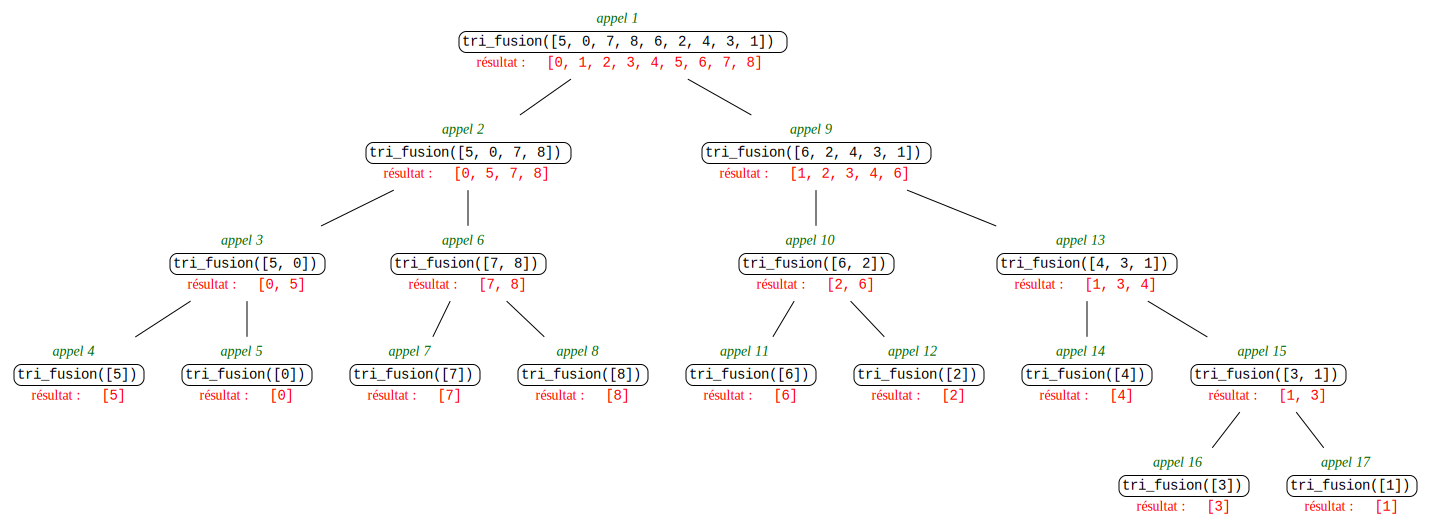

In [55]:
une_liste = [5, 0, 7, 8, 6, 2, 4, 3, 1]
call = tri_fusion(une_liste)
call.graph()

#### Complexité

Coût de la séparation de `lst` : $O($`len(lst)`$)$

Coût de la fusion de `lst1` et `lst2` : $O($`len(lst1)`$+$`len(lst2)`$)$

À chaque « étage » de récursion la somme des longueurs des listes manipulées est la même ($n$), donc le coût total par « étage » est $O(n)$

Comme un divise la taille des listes par deux à chaque étape et qu'on s'arrête quand une liste est de taille 0 ou 1, le nombre d'« étages » est au plus $\lfloor\log_2 n\rfloor+1$

Complexité totale : $O(n \log n)$



### Bilan

On peut montrer que cet algorithme est **optimal**
- dans ce modèle de calcul
- sans autre hypothèse sur `lst`
- asymptotiquement
- dans le pire cas

En pratique, il utilise plus de mémoire que le tri rapide, et peut être un peu plus lent en moyenne

C'est un tri *stable* (des éléments égaux de `lst` restent dans le même ordre dans le résultat), contrairement au tri rapide

Plusieurs variantes possibles

## Le tri de Python

Méthode `sort` : tri sur place de liste

- Algo hybride entre tri par fusion et tri par insertion (*Timsort*)
- Stable, $O(n \log n)$ en temps (au pire et en moyenne), $O(n)$ en espace
- Utilisé par d'autres langages de programmation (par ex. Java)
- **Attention :** trie sur place, ne renvoie pas de liste !
- Possibilité de trier selon un critère donné (`key=f`), ou à l'envers (`reverse=True`)

Variante sans modification de la liste : fonction `sorted`

In [56]:
lst = ["Chennai", "Mumbai", "Kochi", "Delhi", "Calcutta", "Amritsar"]
lst.sort()
lst

['Amritsar', 'Calcutta', 'Chennai', 'Delhi', 'Kochi', 'Mumbai']

In [57]:
lst.sort(reverse=True)
lst

['Mumbai', 'Kochi', 'Delhi', 'Chennai', 'Calcutta', 'Amritsar']

In [58]:
lst.sort(key=len)
lst

['Kochi', 'Delhi', 'Mumbai', 'Chennai', 'Calcutta', 'Amritsar']

In [59]:
def derniere_lettre(s):
   return s[-1]

sorted(lst, key=derniere_lettre)

['Calcutta', 'Kochi', 'Delhi', 'Mumbai', 'Chennai', 'Amritsar']

## Variations autour du tri

### Mélange de liste

On a vu comment trier une liste, mais comment la mélanger uniformément (même probabilité pour chaque mélange) ?

#### Première tentative

In [60]:
from random import randrange

def melange(lst):
    lst = lst.copy()
    for i in range(len(lst)):
        k = randrange(len(lst))
        echange(lst, i, k)
    return lst

In [61]:
from itertools import permutations

lst = [1, 2, 3]
perms = list(permutations(lst))

In [62]:
n = 100000
tmp = [melange(lst) for _ in range(n)]
counts = [tmp.count(list(p)) for p in perms]
counts

[14923, 18387, 18440, 18455, 14880, 14915]

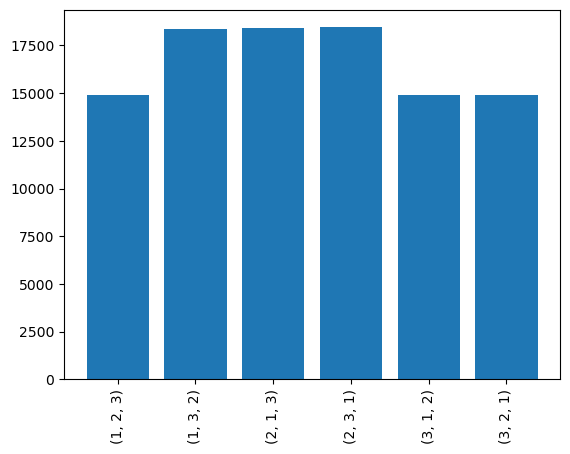

In [63]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(list(map(str, perms)), counts)
ax.xaxis.set_tick_params(rotation=90)

**Exercice :** Quelle est la fréquence d'apparition de chaque résultat possible sur une liste de longueur 3 ?

In [64]:
def melanges(lst):
    res = [lst]
    for i in range(len(lst)):
        res2 = []
        for lst2 in res:
            for k in range(len(lst)):
                lst3 = lst2.copy()
                echange(lst3, i, k)
                res2.append(lst3)
        res = res2
    return res

In [65]:
tmp = melanges(lst)
perms = list(permutations(lst))
counts = [tmp.count(list(p)) for p in perms]
counts

[4, 5, 5, 5, 4, 4]

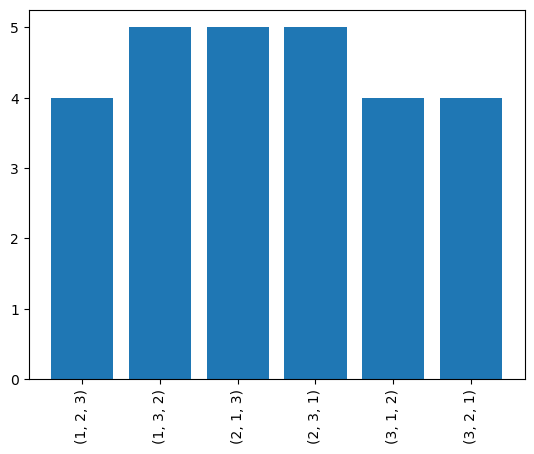

In [66]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(list(map(str, perms)), counts)
ax.xaxis.set_tick_params(rotation=90)

Cet algorithme de mélange est **incorrect !** (non uniforme)

- Nombre de permutations possibles : $n!$
- Nombre d'exécutions possibles de l'algorithme : $n^n$ (beaucoup plus)
- $n^n$ non divisible par $n!$ en général $\rightarrow$ répartition égale impossible


#### Nouvelle tentative

In [67]:
def melange(lst):
    lst = lst.copy()
    for i in range(len(lst)-1):
        k = randrange(i, len(lst))  # changement ici !
        echange(lst, i, k)
    return lst

In [68]:
lst = [1, 2, 3, 4]
perms = list(permutations(lst))

In [69]:
n = 100000
tmp = [melange(lst) for _ in range(n)]
counts = [tmp.count(list(p)) for p in perms]

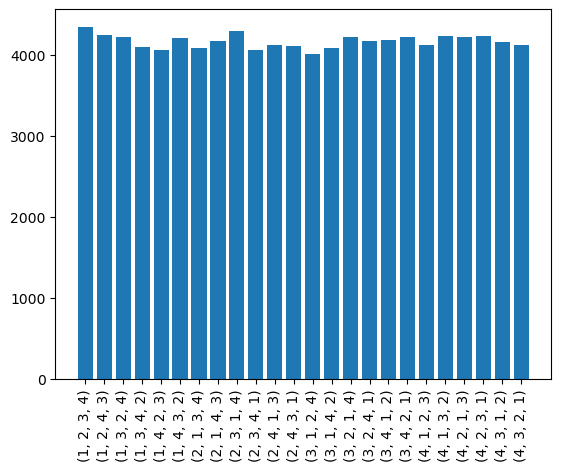

In [70]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(list(map(str, perms)), counts)
ax.xaxis.set_tick_params(rotation=90)

**Exercice :** Quelle est la fréquence d'apparition de chaque résultat possible sur une liste de longueur 3 ?

In [71]:
def melanges(lst):
    res = [lst]
    for i in range(len(lst)):
        res2 = []
        for lst2 in res:
            for k in range(i, len(lst)):
                lst3 = lst2.copy()
                echange(lst3, i, k)
                res2.append(lst3)
        res = res2
    return res

In [72]:
tmp = melanges(lst)
perms = list(permutations(lst))
counts = [tmp.count(list(p)) for p in perms]

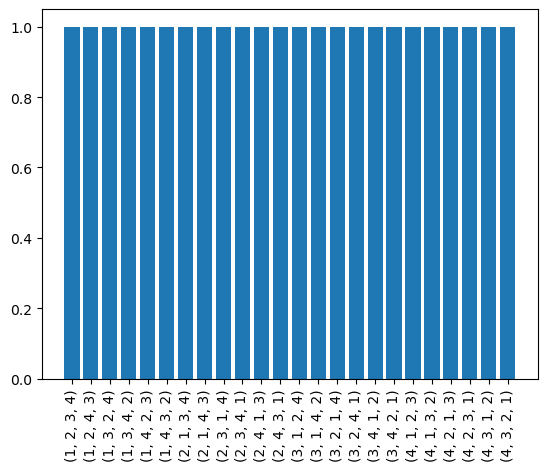

In [73]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
ax.bar(list(map(str, perms)), counts)
ax.xaxis.set_tick_params(rotation=90)

### Recherche de la médiane

Étant donnée une liste `lst` de $n$ éléments comparables, on cherche un élément médian de `lst`

(*Élément médian :* autants d'éléments inférieurs que supérieurs dans `lst`, à 1 près)

**Plus généralement :** on cherche le $k$-e plus petit élément de `lst`

#### Algorithmes naïfs

**Idée 1 :** On trie partiellement jusqu'à avoir les $k$ plus petits éléments (et on renvoie le plus grand)
- tri à bulle : on fait "remonter la bulle" $k$ fois
- tri par sélection : on cherche le plus petit élément $k$ fois
- tri par insertion : on trie en ne mémorisant que les $k$ plus petits éléments

*Note :* cette idée résoud en fait un problème plus général, celui de trouver les $k$ plus petits éléments de `lst` (lien avec le programme de NSI : problème des $k$ plus proches voisins)

*Problème :* pas très efficace avec ces algorithmes... ($O(nk)$)


**Idée 2 :** On trie la liste entière avec un algorithme efficace et on prend l'élément d'indice $k-1$

Complexité acceptable, mais peut-on faire mieux ?

#### Algorithme efficace : « sélection rapide »

Inspiré du tri rapide

**Idée :** On partitionne la liste, puis on ne s'intéresse qu'au côté qui contient le $k$-e plus petit élément (et on ne trie pas l'autre côté)

In [74]:
from random import randint

def plus_petit(lst, k):
    debut = 0
    fin = len(lst)-1
    while True:
        p = partition(lst, debut, fin)
        if p == k:
            return lst[k]
        elif p < k:
            debut = p+1
        else:
            fin = p-1

In [75]:
lst = [3, 1, 7, 8, 4, 2, 9, 0, 5, 6]
plus_petit(lst, 3)

3

**Complexité :** $O(n)$ en temps (en moyenne !) et $O(1)$ en espace

(Et au pire ?)